In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [24]:
img = image.load_img("/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/train/Ulmus carpinifolia/l1nr001.tif",target_size=(224,224))

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


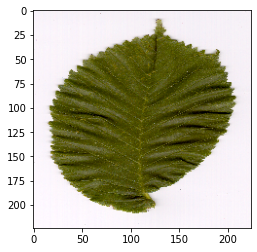

In [26]:
plt.imshow(img)

In [27]:
train = ImageDataGenerator(rescale=1/255)
validation =  ImageDataGenerator(rescale=1/255)

In [28]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/train',target_size=(200,200),batch_size=3,class_mode='categorical')

val_dataset = validation.flow_from_directory('/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/test',target_size=(200,200),batch_size=3,class_mode='categorical')

Found 960 images belonging to 15 classes.
Found 165 images belonging to 15 classes.


In [29]:
train_dataset.class_indices

{'Acer': 0,
 'Alnus incana': 1,
 'Betula pubescens': 2,
 'Fagus silvatica': 3,
 'Populus': 4,
 'Populus tremula': 5,
 'Quercus': 6,
 'Salix alba': 7,
 'Salix aurita': 8,
 'Salix sinerea': 9,
 'Sorbus aucuparia': 10,
 'Sorbus intermedia': 11,
 'Tilia': 12,
 'Ulmus carpinifolia': 13,
 'Ulmus glabra': 14}

In [34]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    #
                                    tf.keras.layers.Dense(15,activation='softmax')
                                    
                                    ])

In [35]:
def callbacks(callback_path):
    # clearing previous model info (if any)
    !rm -rf {callback_path}
    !mkdir {callback_path}

    # callback that saves the model's weights
    cp_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=callback_path,
        monitor='val_loss',
        save_weights_only=False,
        save_best_only=True,
        save_freq='epoch',
        verbose=1
    )

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        verbose=1, 
        mode='auto',
        restore_best_weights=True
    )

    return cp_callback, early_stopping

In [36]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

#model_dst_path = 'temp/model-ckpt_CNN/'
#cp_callback, early_stopping = callbacks(callback_path=model_dst_path)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [37]:
history  = model.fit(train_dataset,validation_data=val_dataset)

320/320 [==============================] - 564s 2s/step - loss: 1.5040 - accuracy: 0.6021 - val_loss: 0.6034 - val_accuracy: 0.8121


In [38]:
model.save('/content/drive/MyDrive/FinalYear_Project/swedish_model/cnnModel.h5')

In [39]:
test_loss,test_acc = model.evaluate(val_dataset,verbose=2)
print('Test Accuracy : ',test_acc)


55/55 - 5s - loss: 0.6034 - accuracy: 0.8121
Test Accuracy :  0.8121212124824524


In [40]:
def plot_model(model):
    return tf.keras.utils.plot_model(
        model=model,
        to_file='/content/drive/MyDrive/FinalYear_Project/Results/CNNmodel.png',
        show_shapes=True,
        show_layer_names=False,
        rankdir='TB',
        expand_nested=True,
        dpi=96
    )

In [41]:
def plot_model_hist(history):
    plt.figure(figsize=(20, 6))
    plt.title('Results')

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], color='orange', label='Training loss')
    plt.plot(history.history['val_loss'], color='red', label='Validation loss')
    plt.legend()
    plt.title(label='Loss')
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Loss Value')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], color='blue', label='Training accuracy')
    plt.plot(history.history['val_accuracy'], color='green', label='Validation accuracy')
    plt.legend();
    plt.title(label='Accuracy')
    plt.xlabel(xlabel='Epochs')
    plt.ylabel(ylabel='Accuracy Value')

    plt.savefig(fname='/content/drive/MyDrive/FinalYear_Project/Results/CNNmodel_history.png', orientation='landscape')

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)            

In [ ]:
plot_model_hist(history=history)

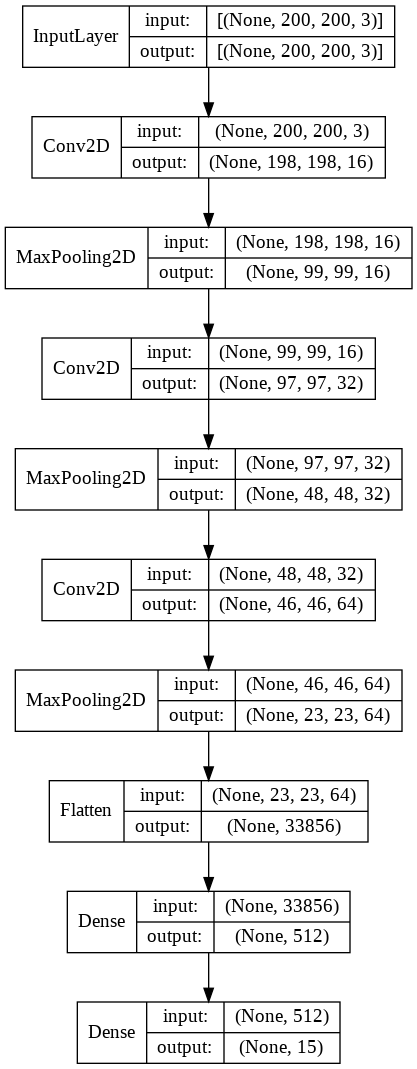

In [44]:
plot_model(model=model)

Copy of l10nr065.tif


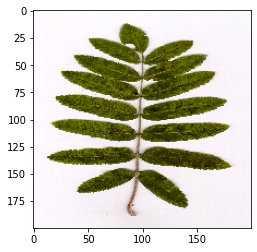

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Copy of l11nr071.tif


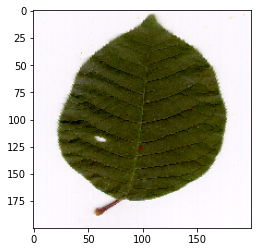

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Copy of l13nr065.tif


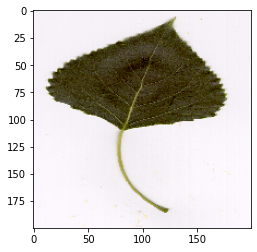

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
Copy of l4nr070.tif


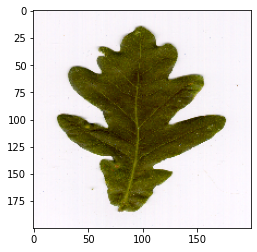

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Copy of l6nr070.tif


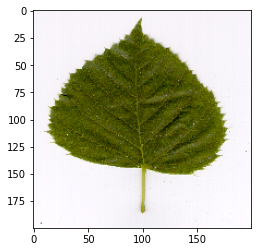

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [45]:
import cv2
import os
import numpy as np

dir_path = '/content/drive/MyDrive/FinalYear_Project/DATASET_for_DL/swedish_dl/val'
##Predicting with model
#loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Models/jay/Resnet.h5')

for i in os.listdir(dir_path):
   img =  image.load_img(dir_path+'/'+i,target_size=(200,200))
   print(i)
   plt.imshow(img)
   plt.show()
   X = image.img_to_array(img)
   X = np.expand_dims(X,axis=0)
   images = np.vstack([X])
   val = model.predict(images)
   print(val)



In [46]:
#Code to generate Confusion Matrix
import pandas as pd
import seaborn as sn
import tensorflow as tf
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


#model = tf.keras.models.load_model('/content/drive/MyDrive/FinalYear_Project/swedish_model/cnnModel.h5')
filenames = val_dataset.filenames
nb_samples = len(val_dataset)
y_prob = []
y_act = []
val_dataset.reset()

for _ in range(nb_samples):
  X_test,Y_test = val_dataset.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)
  y_pred1 = model.predict(X_test)
  arr = np.zeros((15))
  y_pred1 = np.argmax(y_pred1,axis=1)
  arr[y_pred1] = 1
  arr = np.reshape(arr, (1,-1)) 


In [47]:
nrow = len(y_act)
ncol = len(y_act[0])
#print("ncol,nrow {},{}".format(ncol,nrow))
print(y_act)

[array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],
      dtype=float32), array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]],
      dtype=float32), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],
      dtype=float32), array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0.

In [ ]:
val_dataset.class_indices.keys()

In [ ]:
#Generating ConfusionMatrix

predicted_class = [list(val_dataset.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(val_dataset.class_indices.keys())[i.argmax()] for i in y_act]

out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues',annot=True,fmt='d')
plt.show()

#print('Test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum()*100)))
#print(predicted_class)
#print(actual_class)
print(confusion_matrix)

